In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


## Loading Data

In [2]:
data = '/kaggle/input/playground-series-s3e18/'
os.listdir(data)

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
df = pd.read_csv(data+"/train.csv")
df_test = pd.read_csv(data+"/test.csv")
submission = pd.read_csv(data+"/sample_submission.csv")
pd.read_csv(data+"/sample_submission.csv").sample(20).transpose()

,3328,8066,3272,2665,7596,7524,5487,6034,7181,8979,5007,5488,5091,6415,8310,3948,5215,6552,416,179
id,18166.0,22904.0,18110.0,17503.0,22434.0,22362.0,20325.0,20872.0,22019.0,23817.0,19845.0,20326.0,19929.0,21253.0,23148.0,18786.0,20053.0,21390.0,15254.0,15017.0
EC1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
EC2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [4]:
df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


## first tour

In [5]:
df.tail()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0
14837,14837,785.394062,15.671142,9.896164,10.234264,7.860296,8.522605,5.645502,3.312893,82.448246,...,22.701338,71.127044,0,0,0,1,0,1,0,0


In [6]:
df.sample(10)

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
4604,4604,919.952839,10.220051,7.599423,7.599423,6.412719,6.412719,4.255627,2.569694,33.929498,...,14.325937,70.879387,2,2,0,1,0,0,0,1
12829,12829,503.121367,9.558551,4.283134,6.868528,2.684316,5.336400,1.948606,0.362743,42.395693,...,23.086269,31.374731,0,0,1,1,1,0,0,0
4159,4159,1685.119955,18.136667,10.561420,13.561957,8.012199,11.008637,7.483456,2.151882,94.271312,...,36.756485,127.616190,0,0,0,1,1,0,0,0
7325,7325,170.365702,6.511637,2.816497,3.235989,2.719449,2.719449,1.539796,0.895230,32.927539,...,13.883333,39.666667,0,0,0,1,0,1,0,0
8946,8946,55.913403,1.732051,0.408248,0.408248,0.083333,0.083333,0.000000,0.000000,6.472221,...,4.794537,16.666667,0,1,1,1,0,1,0,0
5392,5392,146.218849,5.112591,3.281314,3.281314,2.003874,2.003874,1.456954,0.503411,6.103966,...,4.736863,25.543970,0,0,1,1,0,0,0,0
11008,11008,104.605938,5.036581,2.816497,3.217864,1.975621,2.619452,1.611731,0.648962,23.968546,...,9.589074,27.500000,2,2,0,1,1,0,0,0
11007,11007,156.661273,4.536581,2.664138,2.664138,1.786449,1.786449,0.916700,0.383669,39.031505,...,9.589074,43.333333,2,2,0,0,1,1,0,0
4505,4505,574.170559,6.109061,3.713500,3.713500,2.845982,2.845982,1.975615,1.261435,0.000000,...,0.000000,35.666667,0,0,1,0,0,0,0,1
10550,10550,389.884363,7.468433,4.063628,4.063628,3.402611,3.402611,1.664652,0.846003,12.011146,...,11.215359,46.333333,1,1,1,0,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [8]:
tmp = df.nunique()
tmp[tmp<100]

NumHeteroatoms    40
fr_COO             8
fr_COO2            8
EC1                2
EC2                2
EC3                2
EC4                2
EC5                2
EC6                2
dtype: int64

In [9]:
df[['EC1','EC2']].value_counts()

EC1  EC2
1    1      7507
0    1      4348
1    0      2401
0    0       582
dtype: int64

## EDA

In [10]:
df.loc[df.ExactMolWt>1000]

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
40,40,2625.276798,37.191505,26.879495,32.386280,22.025922,27.646468,16.338700,8.663839,199.197256,...,84.586509,286.477631,0,0,1,1,0,0,0,0
41,41,2196.783123,32.555098,22.500169,28.107975,21.331444,21.331444,13.242467,6.716781,84.554972,...,50.697492,133.054136,0,0,1,0,1,0,0,0
109,109,2174.823843,32.555098,26.548945,28.057464,22.258413,22.258413,16.212191,7.597006,84.554972,...,50.697492,127.692834,0,0,1,1,0,0,0,0
222,222,1912.000910,27.466583,17.665499,21.155450,14.161108,16.927843,14.791220,9.954759,84.554972,...,50.697492,123.655938,0,0,1,0,0,0,0,1
309,309,2196.783123,31.555098,21.251019,27.757805,15.057730,21.056987,13.941594,6.609181,84.554972,...,50.697492,129.394719,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,14660,1900.719062,28.816495,21.251019,27.107975,16.362402,21.000910,11.419852,5.698747,84.554972,...,50.697492,108.186918,0,0,0,0,0,1,1,0
14692,14692,2636.796191,36.780822,26.971027,32.386280,23.571747,28.906830,22.589276,13.620810,108.784777,...,50.697492,159.769382,0,0,1,1,1,0,0,0
14704,14704,2071.716135,30.219545,21.550679,27.057464,17.248358,20.990690,14.330616,7.992407,84.554972,...,50.697492,123.655938,0,0,1,1,0,0,0,0
14760,14760,2625.276798,46.247377,36.841400,39.901993,17.540666,23.084697,16.338700,7.437345,90.658938,...,50.697492,142.581070,0,0,1,0,0,1,0,0


In [11]:
df.describe().transpose()[['mean','std','min','max']]

,mean,std,min,max
id,7418.500000,4283.505982,0.000000,14837.000000
BertzCT,515.153604,542.456370,0.000000,4069.959780
Chi1,9.135189,6.819989,0.000000,69.551167
Chi1n,5.854307,4.647064,0.000000,50.174588
Chi1v,6.738497,5.866444,0.000000,53.431954
Chi2n,4.432570,3.760516,0.000000,32.195368
Chi2v,5.253221,4.925065,0.000000,34.579313
Chi3v,3.418749,3.436208,0.000000,22.880836
Chi4n,1.773472,1.865898,0.000000,16.072810
EState_VSA1,29.202823,31.728679,0.000000,363.705954


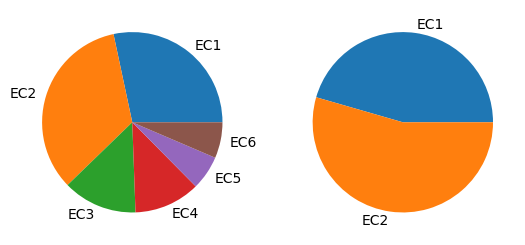

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data = [df.iloc[:, 32:].sum(), df.iloc[:,32:34].sum()]
for i, ax in enumerate([ax1, ax2]):
    ax.pie(data[i], labels=data[i].index)
plt.show()

##### EC1 and EC2 classes are equiibrated

In [13]:
# can really it be 2 EC classes at the same time?
tmp = df.loc[((df.EC1==0)&(df.EC2==0))|((df.EC1==1)&(df.EC2==1))]
df = df[df.EC1 != df.EC2]

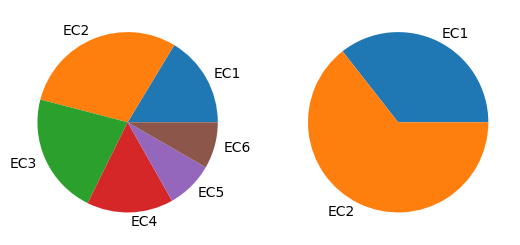

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data = [df.iloc[:, 32:].sum(), df.iloc[:,32:34].sum()]
for i, ax in enumerate([ax1, ax2]):
    ax.pie(data[i], labels=data[i].index)
plt.show()

In [15]:
# classes are not equilibrated
print(len(df.loc[df.EC1==1])/len(df)*100,"% of EC1")
print(len(df.loc[df.EC2==1])/len(df)*100,"% of EC2")
# we take half of EC2 data
actual_EC1 = df.loc[df.EC1==1]
reduced_EC2 = df.loc[df.EC2==1].sample(frac=0.5, random_state=42)
df = pd.concat([actual_EC1,reduced_EC2])

35.57564083567936 % of EC1
64.42435916432065 % of EC2


### data

Text(0.5, 1.0, 'Correlation 4')

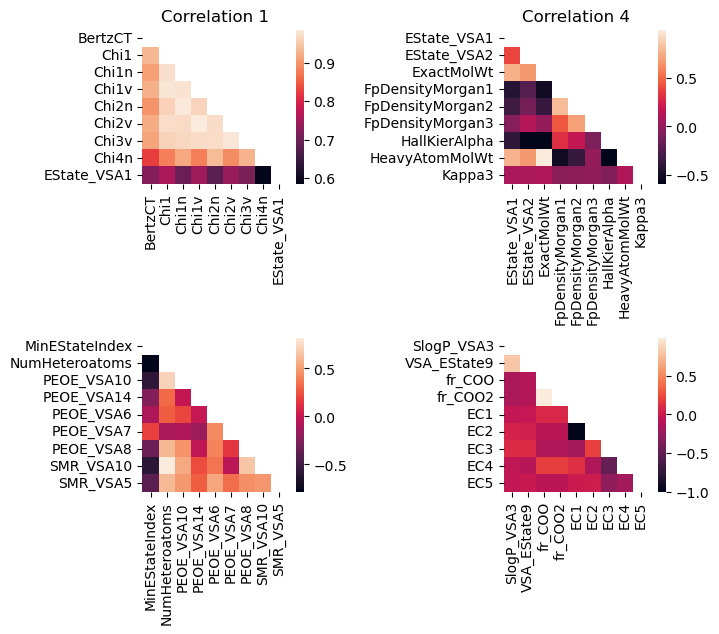

In [16]:
import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,6))
fig.subplots_adjust(wspace=1, hspace=1) 
data = [df.iloc[:,1:10].corr(), df.iloc[:,9:18].corr(), 
        df.iloc[:,19:28].corr(),df.iloc[:,28:37].corr()]
mask = np.triu(np.ones_like(data[0]))
sns.heatmap(data[0], ax=ax1, mask=mask)
ax1.set_title('Correlation 1')
sns.heatmap(data[1], ax=ax2, mask=mask)
ax2.set_title('Correlation 2')
sns.heatmap(data[2], ax=ax3, mask=mask)
ax2.set_title('Correlation 3')
sns.heatmap(data[3], ax=ax4, mask=mask)
ax2.set_title('Correlation 4')

In [17]:
df[['EC1','EC2']].value_counts()

EC1  EC2
1    0      2401
0    1      2174
dtype: int64

/tmp/ipykernel_20/2822364248.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


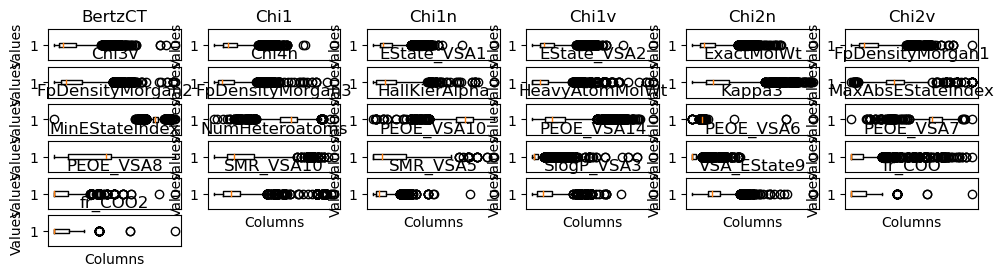

In [18]:
column_names = df.columns[1:32]
num_cols = (len(df.columns[1:32]) // 5) 
num_rows = len(df.columns[1:32]) - num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)


for i, (column, ax) in enumerate(zip(column_names, axes)):
    ax.boxplot(df[column], vert=False)
    ax.set_title(column)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')

    if i < num_cols * (num_rows - 1):
        ax.set_xticks([])

for j in range(len(column_names), num_rows * num_cols):
    fig.delaxes(axes[j])


fig.tight_layout()
plt.show()

In [19]:
for col in df.columns[1:32]:
    subset = df[col]
    q3, q1 = np.percentile(subset, [75 ,25])
    iqr = q3 - q1
    print ("For the colomns",col,"there are outlier above", len(subset.loc[subset > (q3 + 1.5 * iqr)])," and outliers below", len(subset.loc[subset < (q1 - 1.5 * iqr)]))
    df.loc[df[col] > (q3 + 1.5 * iqr),col] = (q3 + 1.5 * iqr)
    df.loc[df[col] < (q1 - 1.5 * iqr),col] = (q1 - 1.5 * iqr)
    
print("all outliers are reassigned their moustache value")

for col in df_test.columns[1:32]:
    print ("For the colomns",col,"there are outlier above", len(subset.loc[subset > (q3 + 1.5 * iqr)])," and outliers below", len(subset.loc[subset < (q1 - 1.5 * iqr)]))
    df_test.loc[df_test[col] > (q3 + 1.5 * iqr),col] = (q3 + 1.5 * iqr)
    df_test.loc[df_test[col] < (q1 - 1.5 * iqr),col] = (q1 - 1.5 * iqr)
    
print("all outliers are reassigned their moustache value")

For the colomns BertzCT there are outlier above 424  and outliers below 0
For the colomns Chi1 there are outlier above 375  and outliers below 0
For the colomns Chi1n there are outlier above 268  and outliers below 0
For the colomns Chi1v there are outlier above 341  and outliers below 0
For the colomns Chi2n there are outlier above 287  and outliers below 0
For the colomns Chi2v there are outlier above 341  and outliers below 0
For the colomns Chi3v there are outlier above 340  and outliers below 0
For the colomns Chi4n there are outlier above 234  and outliers below 0
For the colomns EState_VSA1 there are outlier above 67  and outliers below 0
For the colomns EState_VSA2 there are outlier above 493  and outliers below 0
For the colomns ExactMolWt there are outlier above 381  and outliers below 0
For the colomns FpDensityMorgan1 there are outlier above 49  and outliers below 17
For the colomns FpDensityMorgan2 there are outlier above 125  and outliers below 194
For the colomns FpDensi

In [20]:
df[['EC1','EC2']].value_counts()

EC1  EC2
1    0      2401
0    1      2174
dtype: int64

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_(col):
    compo = len(col)
    pca = PCA(n_components=compo)
    x = StandardScaler().fit_transform(df.loc[:,col])
    x = pd.DataFrame(x, columns=col)
    pca.fit(x)
    
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(
        pca.components_.T,
        annot=True,
        cmap='coolwarm',
        ax=ax
    )
    
    ax.set_xlabel('Principal Components')
    ax.set_ylabel('Column Names')
    ax.set_xticklabels(['PC{}'.format(i+1) for i in range(pca.n_components_)])
    ax.set_yticklabels(col)
    plt.xticks(rotation=45)

    plt.show()
    return pca, x

def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(3,3))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

['Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n']

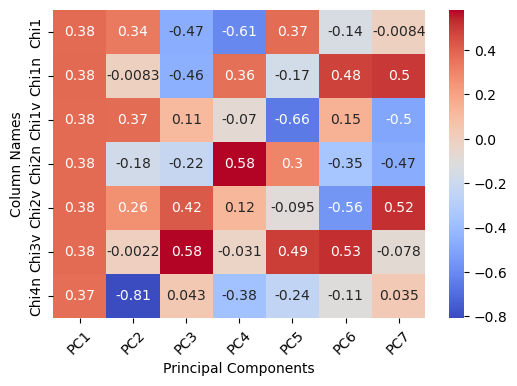

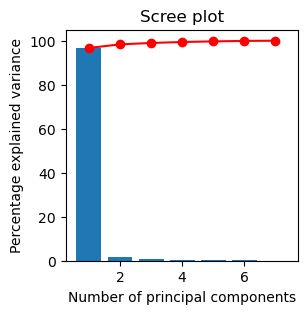

In [22]:
cols = df.iloc[:,2:9].columns.to_list()
display(cols)
pca, x = pca_(cols)
display_scree_plot(pca)
df['Chi_PCA'] = pca.transform(x)[:,0]

# make transform for test
scaler = StandardScaler().fit(df.loc[:,cols])
x_test = pd.DataFrame(scaler.transform(df_test.loc[:,cols]), columns=cols)
df_test['Chi_PCA'] = pca.transform(x_test)[:,0]

['FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3']

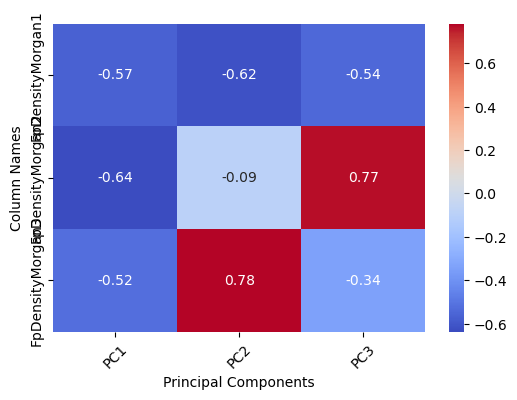

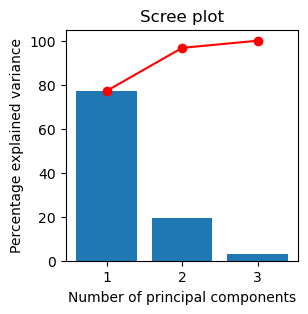

In [23]:
cols = df.iloc[:,12:15].columns.to_list()
display(cols)
pca, x = pca_(cols)
display_scree_plot(pca)
df['FpDensityMorgan_PCA'] = pca.transform(x)[:,0]

# make transform for test
scaler = StandardScaler().fit(df.loc[:,cols])
x_test = pd.DataFrame(scaler.transform(df_test.loc[:,cols]), columns=cols)
df_test['FpDensityMorgan_PCA'] = pca.transform(x_test)[:,0]

['fr_COO', 'fr_COO2']

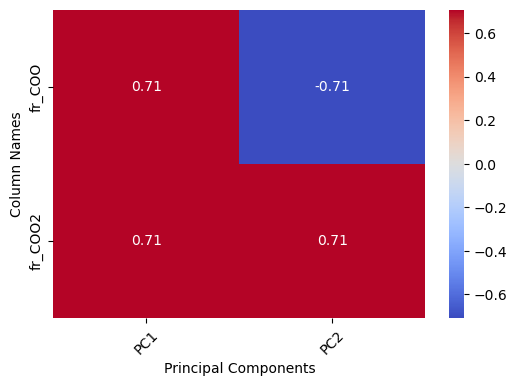

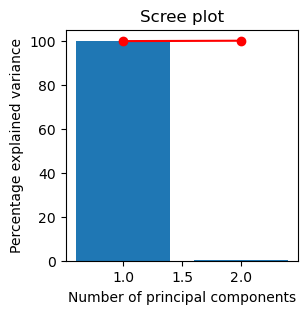

In [24]:
cols = df.iloc[:,30:32].columns.to_list()
display(cols)
pca, x = pca_(cols)
display_scree_plot(pca)
df['fr_COO_PCA'] = pca.transform(x)[:,0]

# make transform for test
scaler = StandardScaler().fit(df.loc[:,cols])
x_test = pd.DataFrame(scaler.transform(df_test.loc[:,cols]), columns=cols)
df_test['fr_COO_PCA'] = pca.transform(x_test)[:,0]

['PEOE_VSA10', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8']

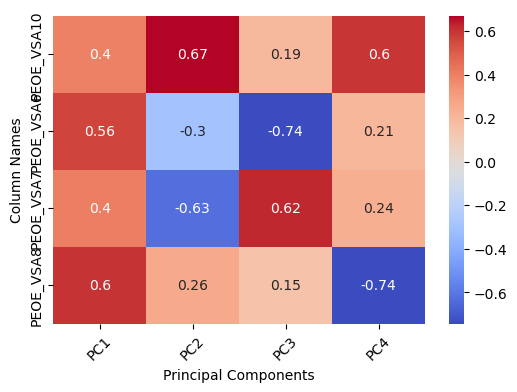

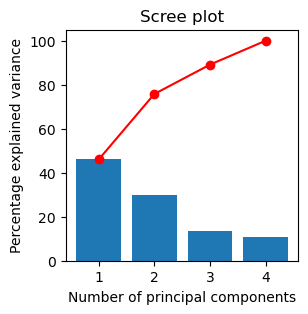

must keep PEOE_VSA14 that is independent


In [25]:
cols = df.iloc[:,21:26].columns.to_list()
cols.remove('PEOE_VSA14')
display(cols)
pca, x = pca_(cols)
display_scree_plot(pca)
df['VSA_PEOE_PCA1'] = pca.transform(x)[:,0]
df['VSA_PEOE_PCA2'] = pca.transform(x)[:,1]
print("must keep PEOE_VSA14 that is independent")

# make transform for test
scaler = StandardScaler().fit(df.loc[:,cols])
x_test = pd.DataFrame(scaler.transform(df_test.loc[:,cols]), columns=cols)
df_test['VSA_PEOE_PCA1'] = pca.transform(x_test)[:,0]
df_test['VSA_PEOE_PCA2'] = pca.transform(x_test)[:,1]

['SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9']

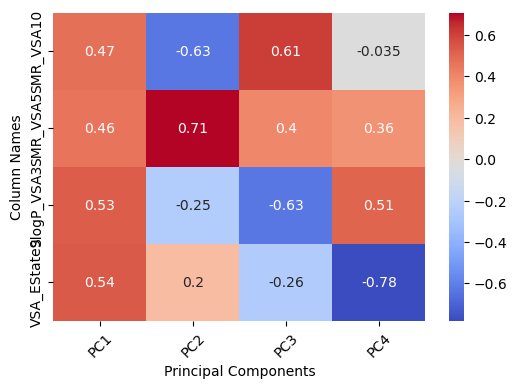

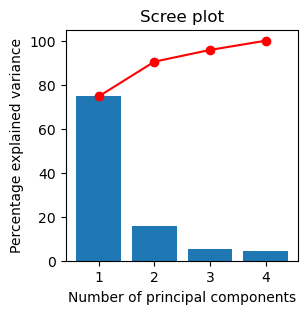

In [26]:
cols = df.iloc[:,26:30].columns.to_list()
display(cols)
pca, x = pca_(cols)
display_scree_plot(pca)
df['SMR_VSA_PCA'] = pca.transform(x)[:,0]

# make transform for test
scaler = StandardScaler().fit(df.loc[:,cols])
x_test = pd.DataFrame(scaler.transform(df_test.loc[:,cols]), columns=cols)
df_test['SMR_VSA_PCA'] = pca.transform(x_test)[:,0]

col = df.iloc[:,2:9].columns.tolist()+df.iloc[:,32:33].columns.tolist()
sns.pairplot(df[col], hue='EC1')

col = df.iloc[:,2:9].columns.tolist()+df.iloc[:,38:39].columns.tolist()
sns.pairplot(df[col], hue='EC')

colors = sns.color_palette('pastel')[0:5]
plt.pie(df.EC.value_counts(), labels = df.EC.unique(), colors = colors, autopct='%.0f%%')
plt.show()

In [27]:
#df['EC'] = df.EC1.astype(str) + ' ' + df.EC2.astype(str)
#sns.pairplot(df['Chi4n','EC'],hue='EC')

In [28]:
df.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6',
       'Chi_PCA', 'FpDensityMorgan_PCA', 'fr_COO_PCA', 'VSA_PEOE_PCA1',
       'VSA_PEOE_PCA2', 'SMR_VSA_PCA'],
      dtype='object')

In [29]:
col_X = df.columns[1:2].to_list() + df.columns[9:12].to_list() + df.columns[15:21].to_list() + df.columns[22:23].to_list() + df.columns[38:43].to_list()
#col_X.remove('HeavyAtomMolWt')
#col_X.remove('MinEStateIndex')
col_y = df.columns[32:34].to_list()
display(col_X)
display(col_y)

['BertzCT',
 'EState_VSA1',
 'EState_VSA2',
 'ExactMolWt',
 'HallKierAlpha',
 'HeavyAtomMolWt',
 'Kappa3',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'NumHeteroatoms',
 'PEOE_VSA14',
 'Chi_PCA',
 'FpDensityMorgan_PCA',
 'fr_COO_PCA',
 'VSA_PEOE_PCA1',
 'VSA_PEOE_PCA2']

['EC1', 'EC2']

<Axes: >

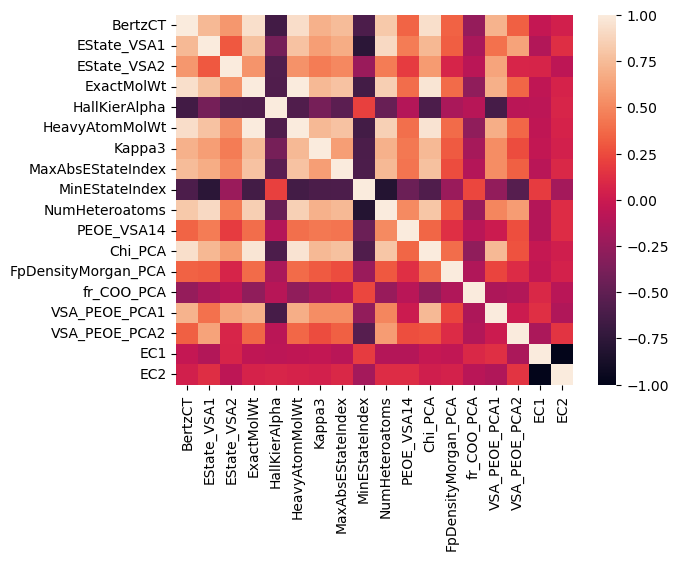

In [30]:
sns.heatmap(df[col_X+col_y].corr())

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df[col_X], df['EC1'], test_size = 0.33, random_state=42, stratify = df['EC1'])
scaler = StandardScaler()#MinMaxScaler()#feature_range=(-1,1))
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#X_train_sc_ = pd.DataFrame(np.concatenate((X_train_sc,np.array(y_train)),axis=1), columns=col_X+col_y[0])

### grid search cv with random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'random_state': [42]  # Random seed for reproducibility
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

**Pour EC1**
Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}\
Best Score:  0.6570962479608483\
Test Accuracy:  0.6827814569536423

**Pour EC2**
Best Parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}\
Best Score:  0.6623164763458401\
Test Accuracy:  0.676158940397351

### gridsearch cv with logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

param_grid = {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'sag', 'lbfgs'],  # Solver algorithm for optimization
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'random_state': [42]  # Random seed for reproducibility
}

logreg = LogisticRegression()
log_grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy')
log_grid_search.fit(X_train, y_train)

best_params_log = log_grid_search.best_params_
best_score_log = log_grid_search.best_score_
print("Best Parameters: ", best_params_log)
print("Best Score: ", best_score_log)

best_model = log_grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

**For EC1** 
Best Parameters:  {'C': 1.0, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}\
Best Score:  0.6208809135399674\
Test Accuracy:  0.6483443708609271\
**For EC2**
Best Parameters:  {'C': 10.0, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}\
Best Score:  0.630995106035889\
Test Accuracy:  0.6437086092715232

### one by one predixtion with logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 1.0, penalty='l2', random_state=42, solver='liblinear')
classifier.fit(X_train,y_train)
pred_EC1 = classifier.predict(X_test)
proba_EC1 = classifier.predict_proba(X_test)

In [33]:
pred_EC1

array([1, 1, 1, ..., 0, 0, 1])

In [34]:
proba_EC1

array([[0.42978077, 0.57021923],
       [0.35544388, 0.64455612],
       [0.42489073, 0.57510927],
       ...,
       [0.66320934, 0.33679066],
       [0.54114243, 0.45885757],
       [0.43605596, 0.56394404]])

##### a way to train using auc_roc_score to improve perfomance

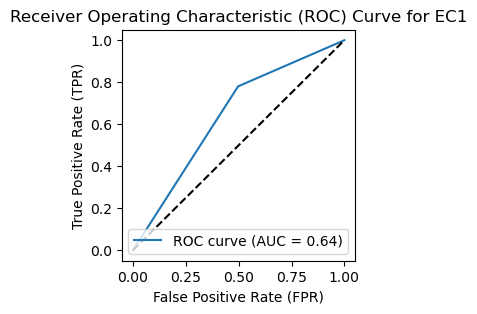

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, pred_EC1)
fpr, tpr, thresholds = roc_curve(y_test, pred_EC1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for EC1')
plt.legend(loc='lower right')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[col_X], df['EC2'], test_size = 0.33, random_state=42, stratify = df['EC2'])
scaler = StandardScaler()#MinMaxScaler()#feature_range=(-1,1))
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

classifier = LogisticRegression(C=10.0, penalty='l1', random_state=42, solver='liblinear')
classifier.fit(X_train,y_train)
pred_EC2 = classifier.predict(X_test)
proba_EC2 = classifier.predict_proba(X_test)

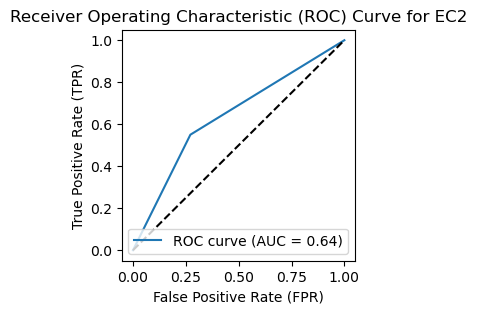

In [37]:
roc_auc = roc_auc_score(y_test, pred_EC2)
fpr, tpr, thresholds = roc_curve(y_test, pred_EC2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for EC2')
plt.legend(loc='lower right')
plt.show()

#### make predictions

In [38]:
classifier = LogisticRegression(C= 1.0, penalty='l2', random_state=42, solver='liblinear')
classifier.fit(df[col_X], df['EC1'])
final_pred_EC1 = classifier.predict(df_test[col_X])
final_proba_EC1 = classifier.predict_proba(df_test[col_X])

classifier = LogisticRegression(solver='sag')
classifier.fit(df[col_X], df['EC2'])
final_pred_EC2 = classifier.predict(df_test[col_X])
final_proba_EC2 = classifier.predict_proba(df_test[col_X])

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([  25.,  365.,  997., 1346., 1944., 1888., 2132.,  941.,  234.,
          21.]),
 array([1.25400008, 1.31465491, 1.37530974, 1.43596456, 1.49661939,
        1.55727422, 1.61792905, 1.67858387, 1.7392387 , 1.79989353,
        1.86054836]),
 <BarContainer object of 10 artists>)

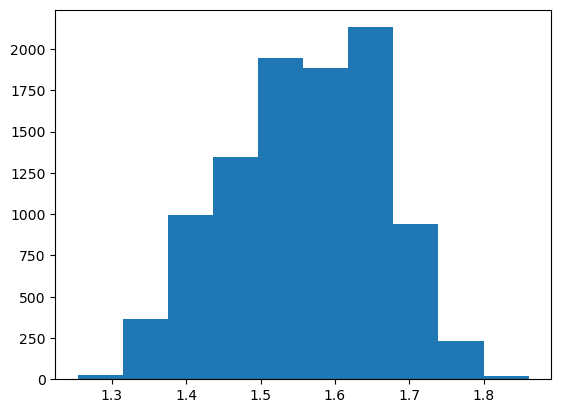

In [39]:
plt.hist(final_proba_EC1[:,1]/final_proba_EC2[:,1])

In [40]:
submission['EC1'] = final_proba_EC1[:,1]
submission['EC2'] = 1-submission['EC1']

submission.drop('id', axis=1)
submission.to_csv('Enzymes_Season3_Episode18.csv', index = False)

### multioutput with logistic regression

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer


classifier = RandomForestClassifier(max_depth=10, 
                                    max_features='sqrt',
                                    min_samples_leaf=1, 
                                    min_samples_split=5, 
                                    n_estimators=200, 
                                    random_state=42)
classifier.fit(df[col_X], df['EC1'])
final_pred_EC1 = classifier.predict(df_test[col_X])
final_proba_EC1 = classifier.predict_proba(df_test[col_X])

submission['EC1'] = final_proba_EC1[:,1]
submission['EC2'] = 1-submission['EC1']

submission.drop('id', axis=1)
submission.to_csv('Enzymes_Season3_Episode18_rf_best_params.csv', index = False)